In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('P_TD_Size_Checks.csv')

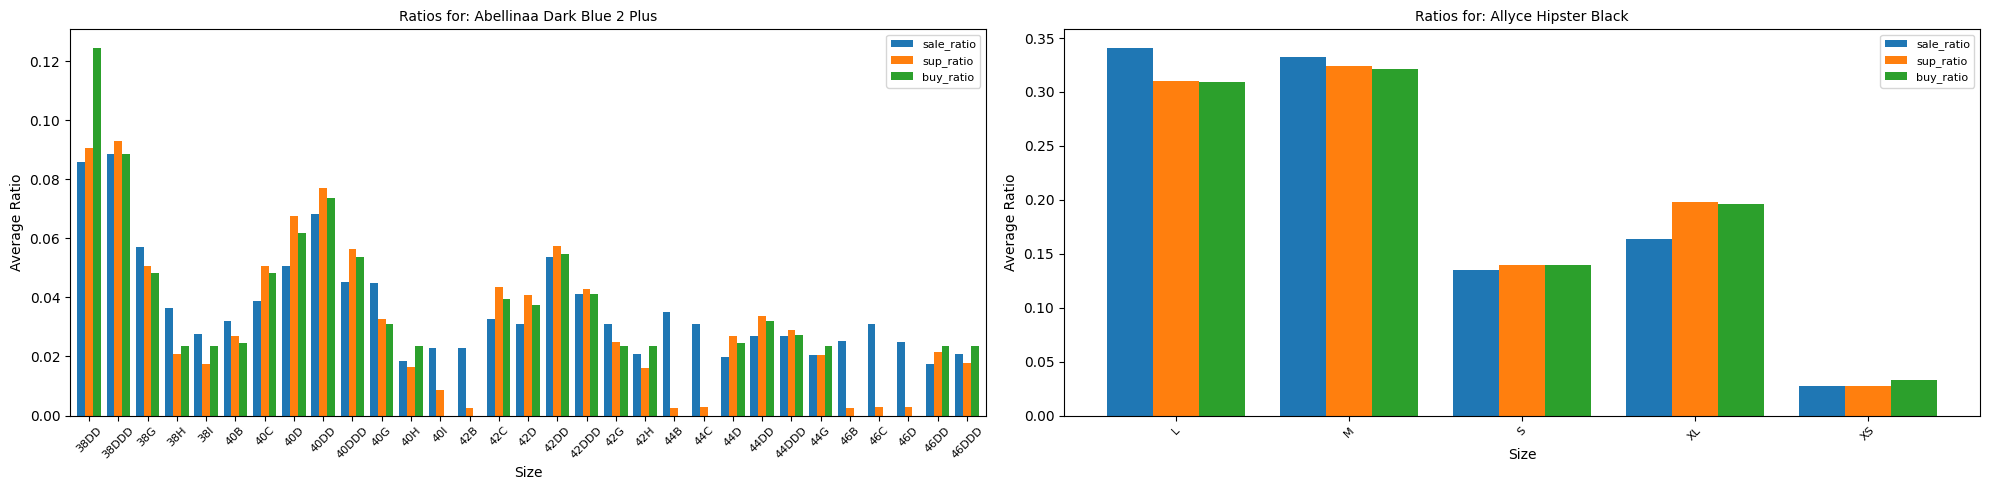

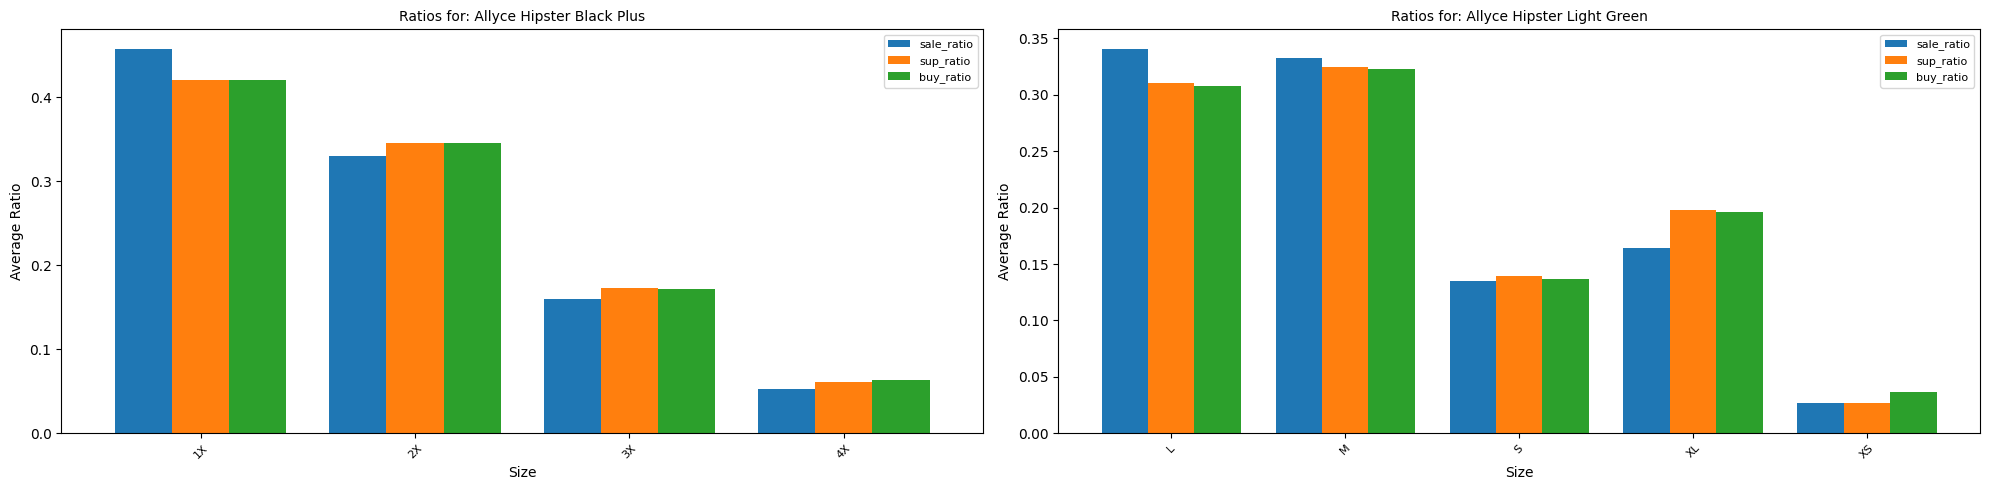

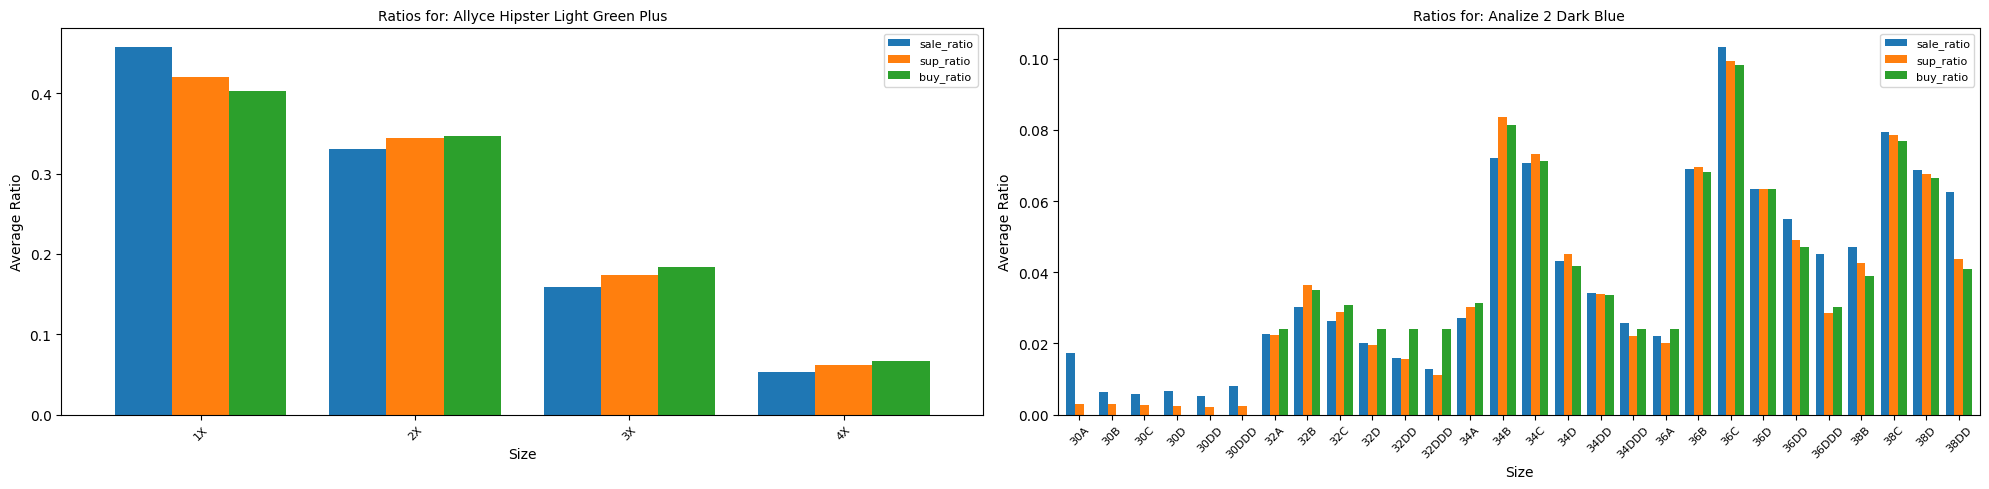

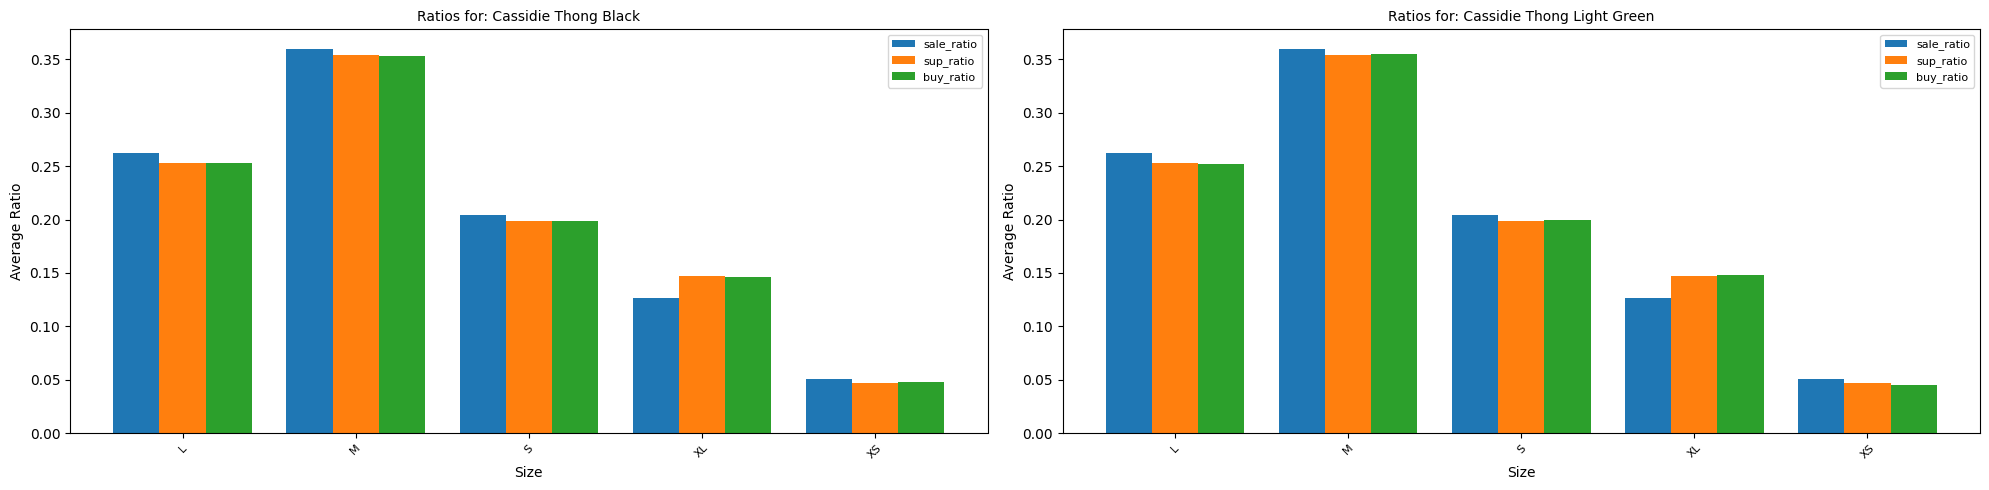

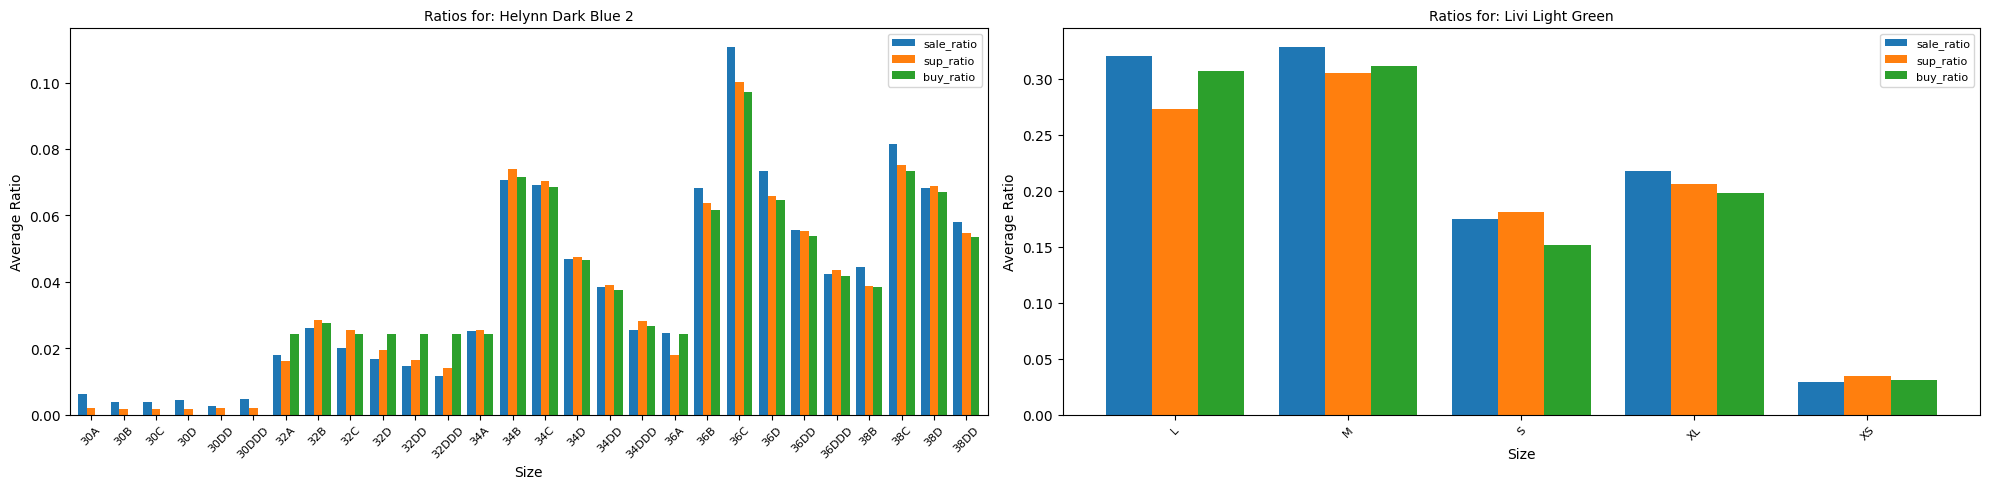

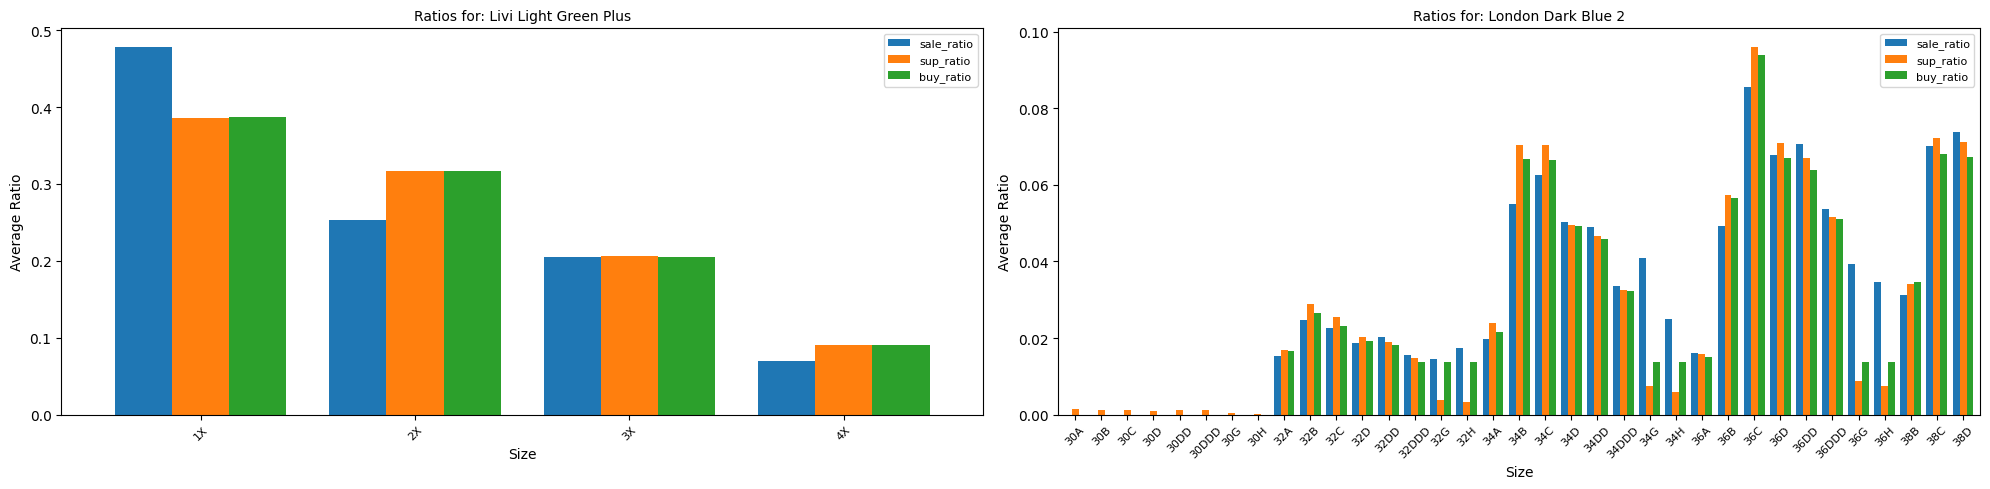

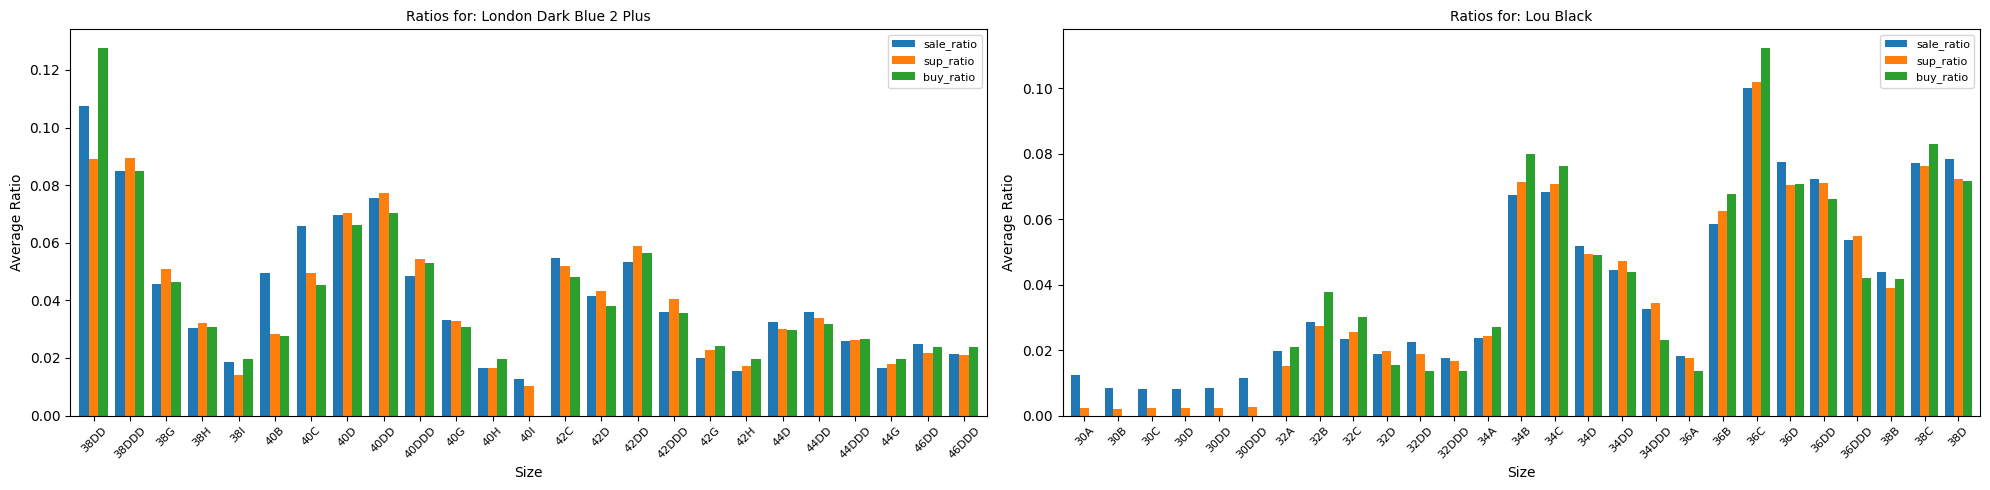

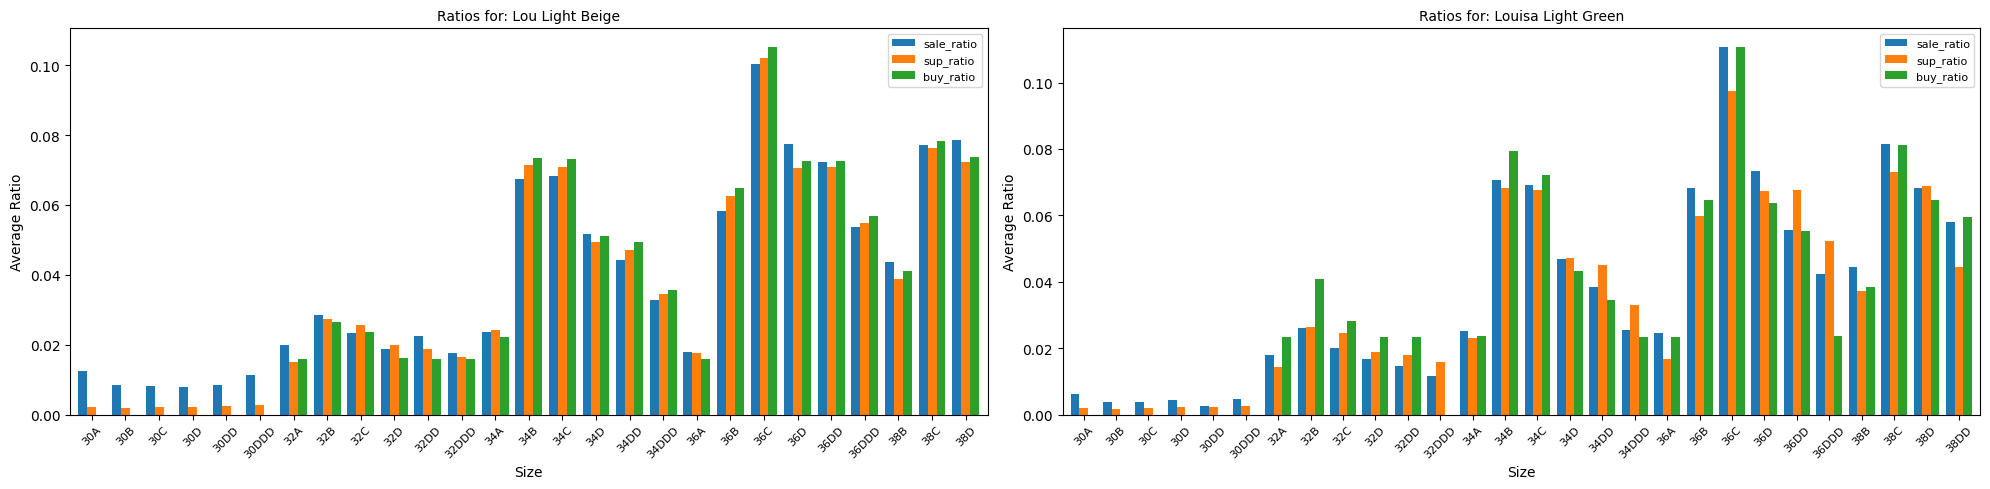

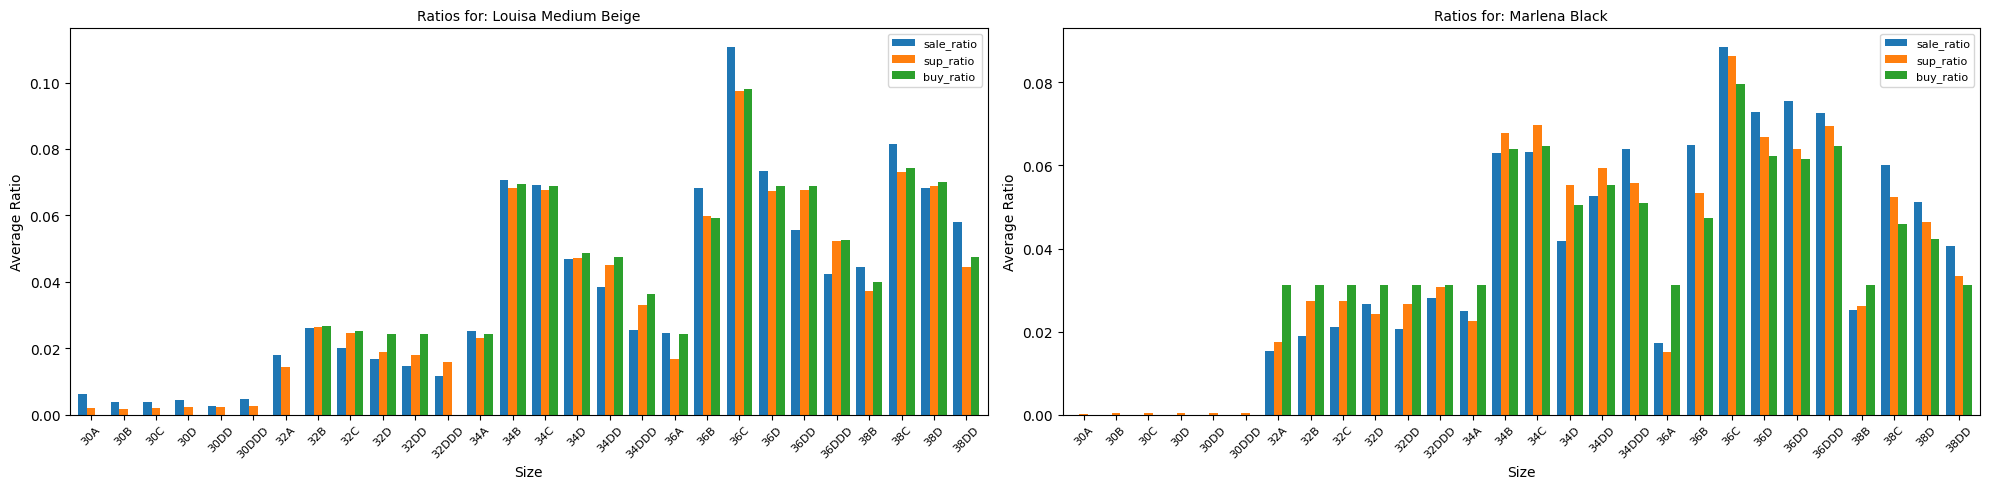

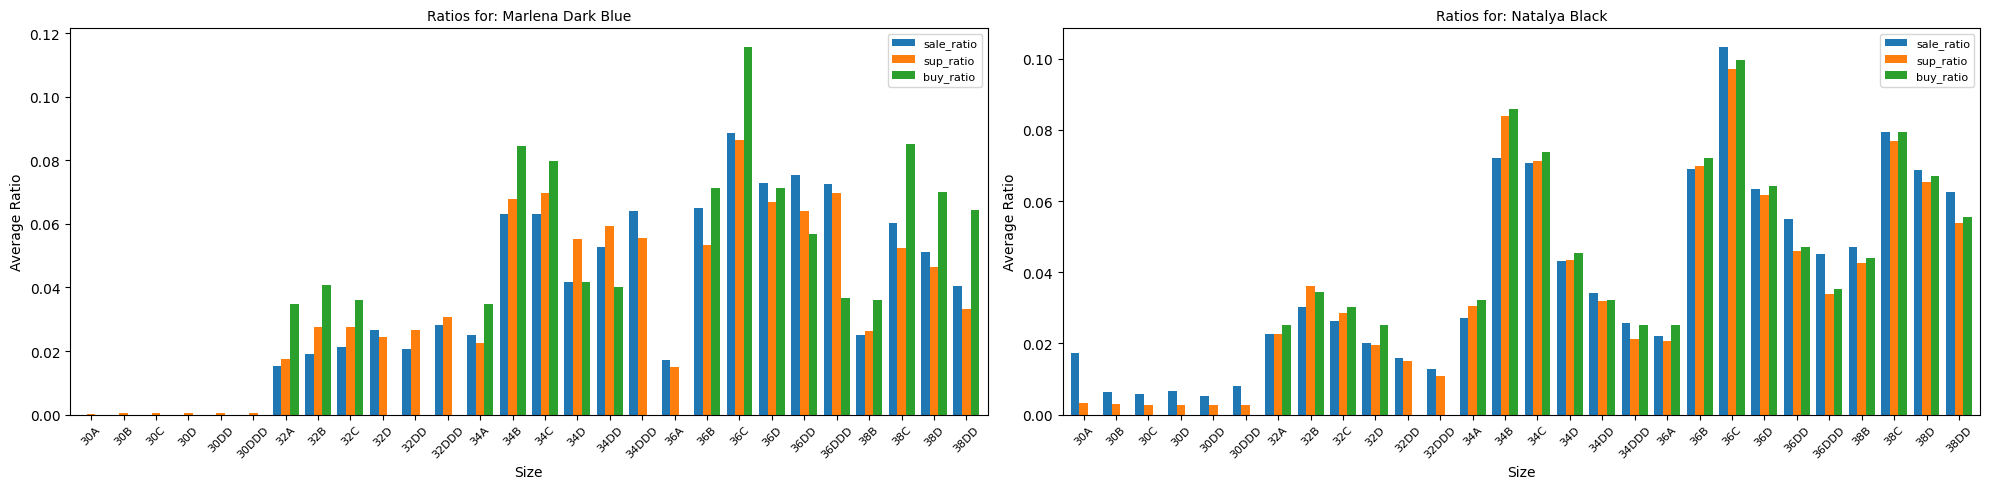

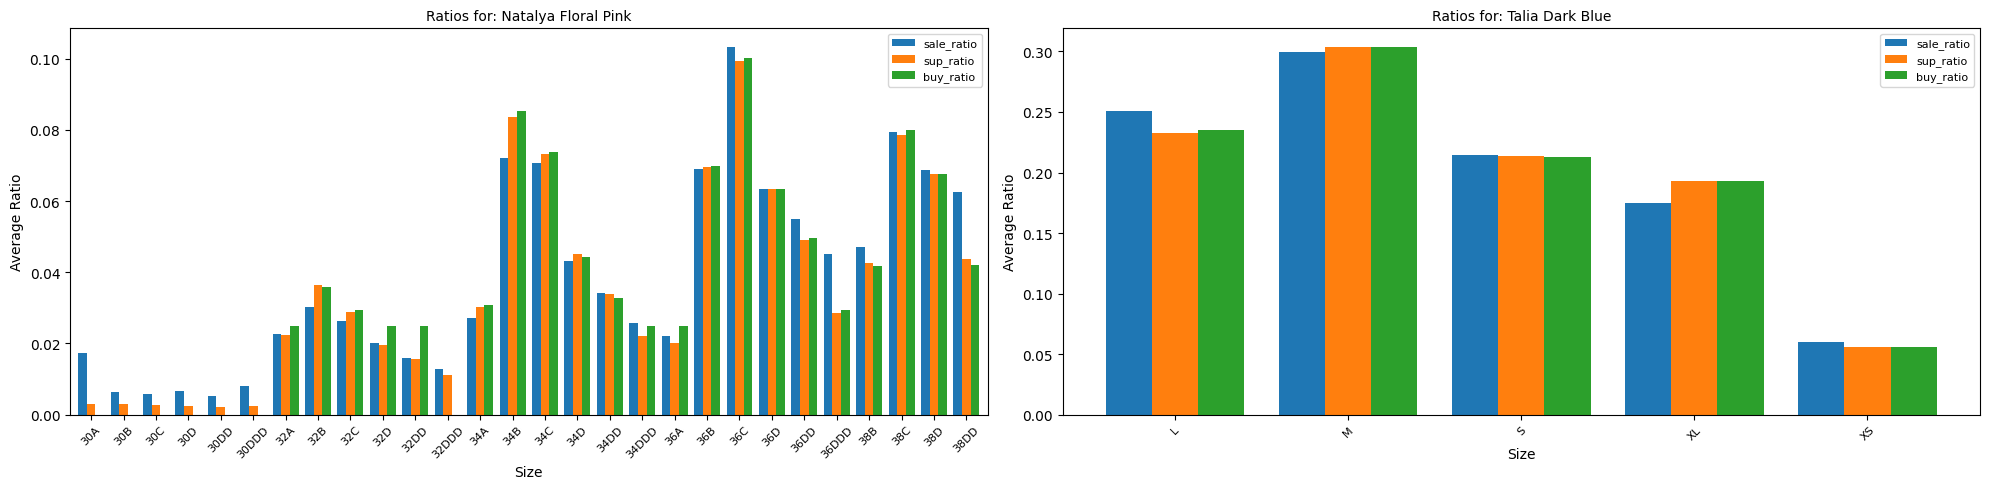

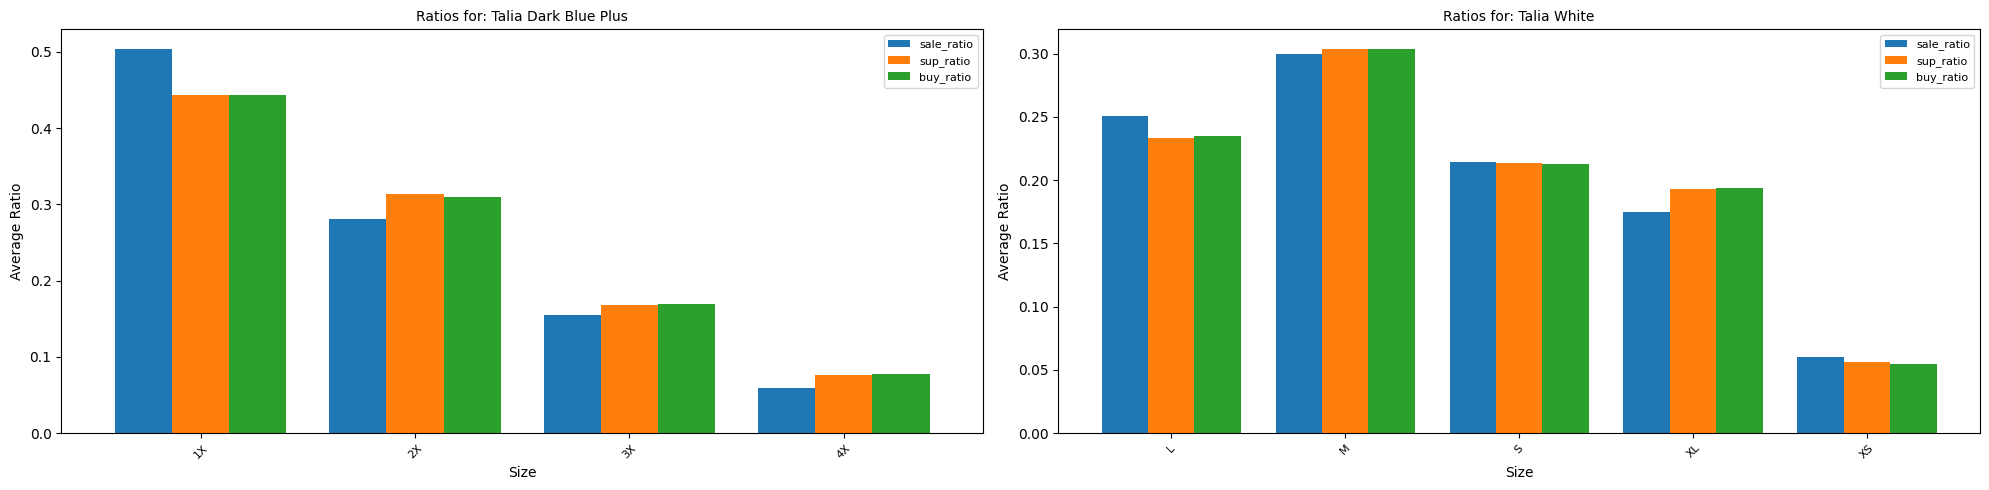

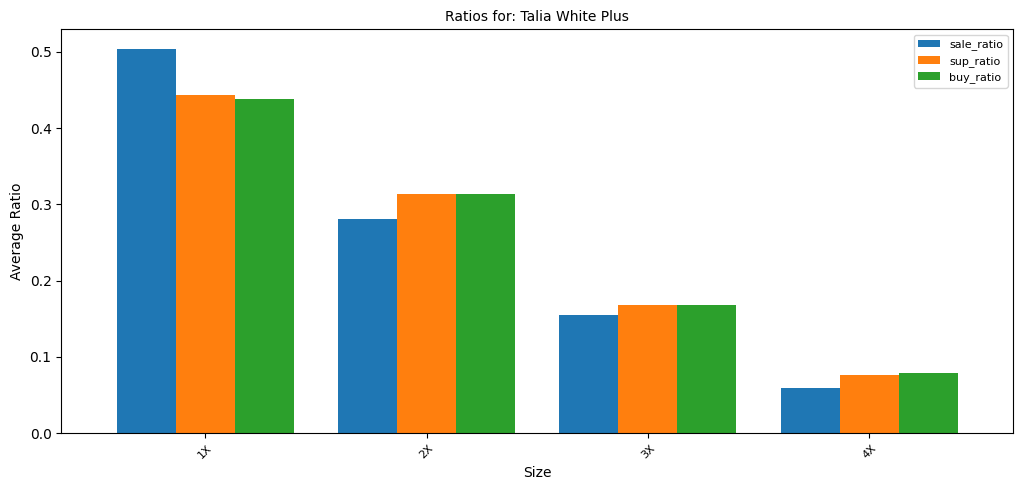

In [2]:
# Ensure ratio columns are numeric, converting non-numeric values to NaN, then fill NaN with 0
ratio_cols = ['sale_ratio', 'sup_ratio', 'buy_ratio']
for col in ratio_cols:
    # The 'coerce' option turns non-numeric data into NaN (Not a Number)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now, fill any resulting NaN values with 0
df[ratio_cols] = df[ratio_cols].fillna(0)

# Get unique product names and sort them
product_names = sorted(df['Frontend_name'].unique())
num_products = len(product_names)

# Define subplot grid for 4 charts in a row
nrows = 1
ncols = 2
charts_per_figure = nrows * ncols

# Loop through products and create figures with subplots
for i in range(0, num_products, charts_per_figure):
    # Create a new figure and subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5))
    # If there's only one subplot, axes is not an array, so make it one
    if ncols == 1 and nrows == 1:
        axes = [axes]
    else:
        # Flatten axes array for easy iteration
        axes = axes.flatten()


    # Get the products for the current figure
    products_for_figure = product_names[i:i + charts_per_figure]

    # Plot each product on a subplot
    for j, frontend_name in enumerate(products_for_figure):
        ax = axes[j]
        # Create a subset of the data for the current product
        subset = df[df['Frontend_name'] == frontend_name]

        if not subset.empty:
            # Group the subset by 'Size' and calculate the average of the ratio columns
            plot_data = subset.groupby('Size')[ratio_cols].mean()

            # Check if there is data to plot after grouping
            if not plot_data.empty:
                # Use pandas' built-in plotting to create a bar chart on the specific axis
                plot_data.plot(kind='bar', ax=ax, width=0.8)

                # Set chart titles and labels for clarity
                ax.set_xlabel("Size")
                ax.set_ylabel("Average Ratio")
                ax.set_title(f"Ratios for: {frontend_name}", fontsize=10)
                ax.tick_params(axis='x', rotation=45, labelsize=8)
                ax.legend(fontsize=8)

    # Hide any unused subplots
    for j in range(len(products_for_figure), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout() # Adjust plot to prevent labels from overlapping
    plt.show()